<h1> Outlier Detection </h1>

In [101]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.DataFrame(load_wine()["data"],columns=load_wine()["feature_names"])
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


<h2> 1-Box Plot <h2>

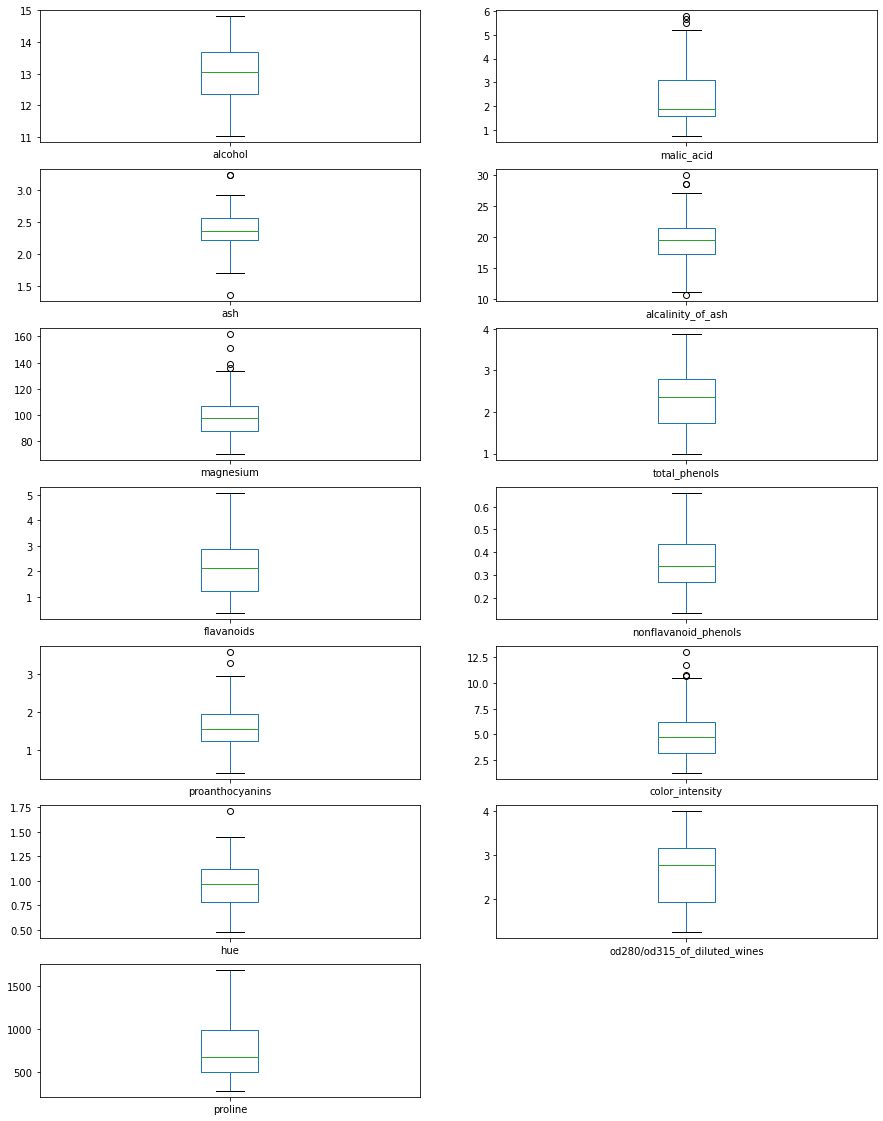

In [102]:
data.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

<h2> 2-IQR <h2>

In [46]:
#FUNCTION TO IDENTIFY OUTLIERS USING IQR METHOD
def iqr_outlier(x,factor):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    min_ = q1 - factor * iqr
    max_ = q3 + factor * iqr
    result_ = pd.Series([0] * len(x))
    result_[((x < min_) | (x > max_))] = 1
    return result_

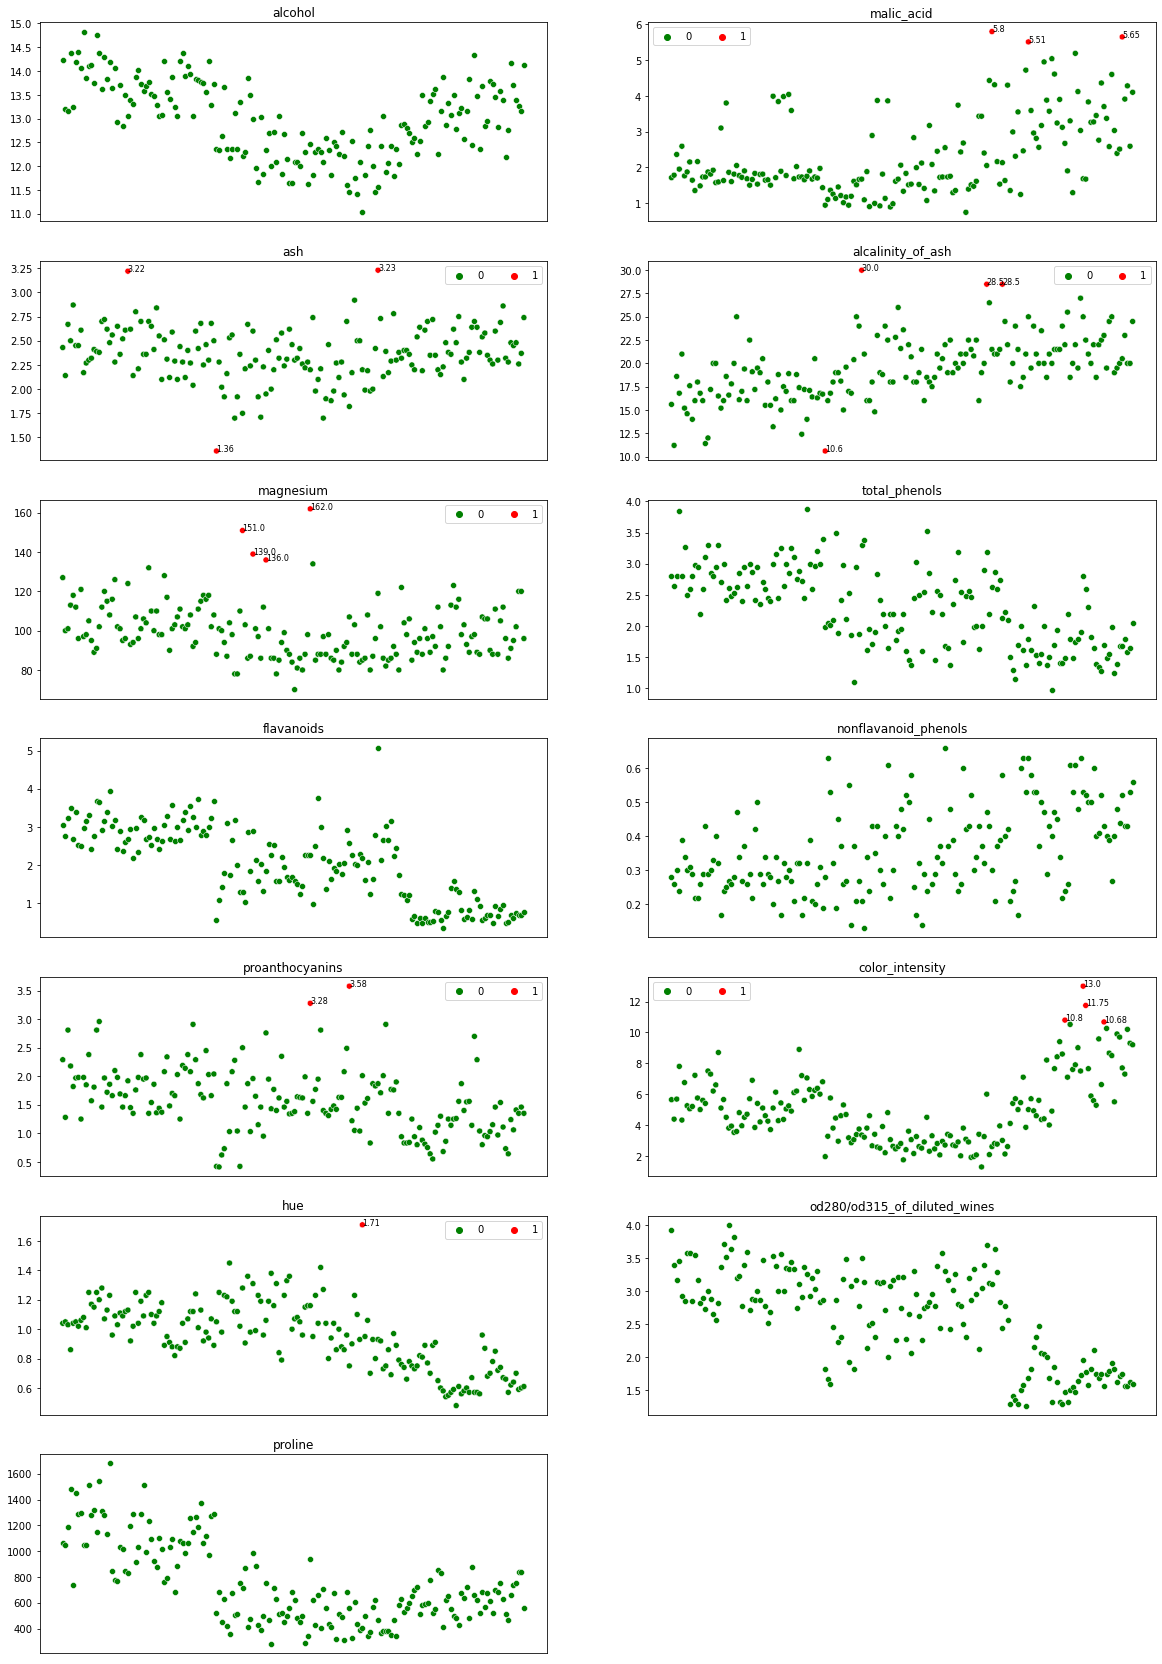

In [47]:
#SCATTER PLOTS HIGHLIGHTING OUTLIERS CALCULATED USING IQR METHOD
fig, ax = plt.subplots(7, 2, figsize=(20, 30))
row = col = 0
for n,i in enumerate(data.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    outliers = iqr_outlier(data[i], 1.5)
   
    if sum(outliers) == 0:
        sns.scatterplot(x = np.arange(len(data[i])), y = data[i], ax = ax[row, col], legend=False, color = 'green')
    else:
        sns.scatterplot(x = np.arange(len(data[i])), y = data[i], ax = ax[row, col], hue = outliers, palette = ['green','red'])
    for x,y in zip(np.arange(len(data[i]))[outliers == 1], data[i][outliers == 1]):
        ax[row,col].text(x = x, y = y, s = y, fontsize = 8)
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1
ax[row,col].axis('off')
plt.show()

<h2> 3-Z_Score </h2> <br>
<h5>Z-Score = (X - mean) / Standard deviation </h5>

In [48]:
#FUNCTION TO DETECT OUTLIERS USING Z-SCORE METHOD
def zscore_outlier(x,lb,ub):
    zscore = ((x - x.mean()) / x.std()).copy()
    result_ = pd.Series([0] * len(x))
    result_[((zscore < lb) | (zscore > ub))] = 1
    return result_

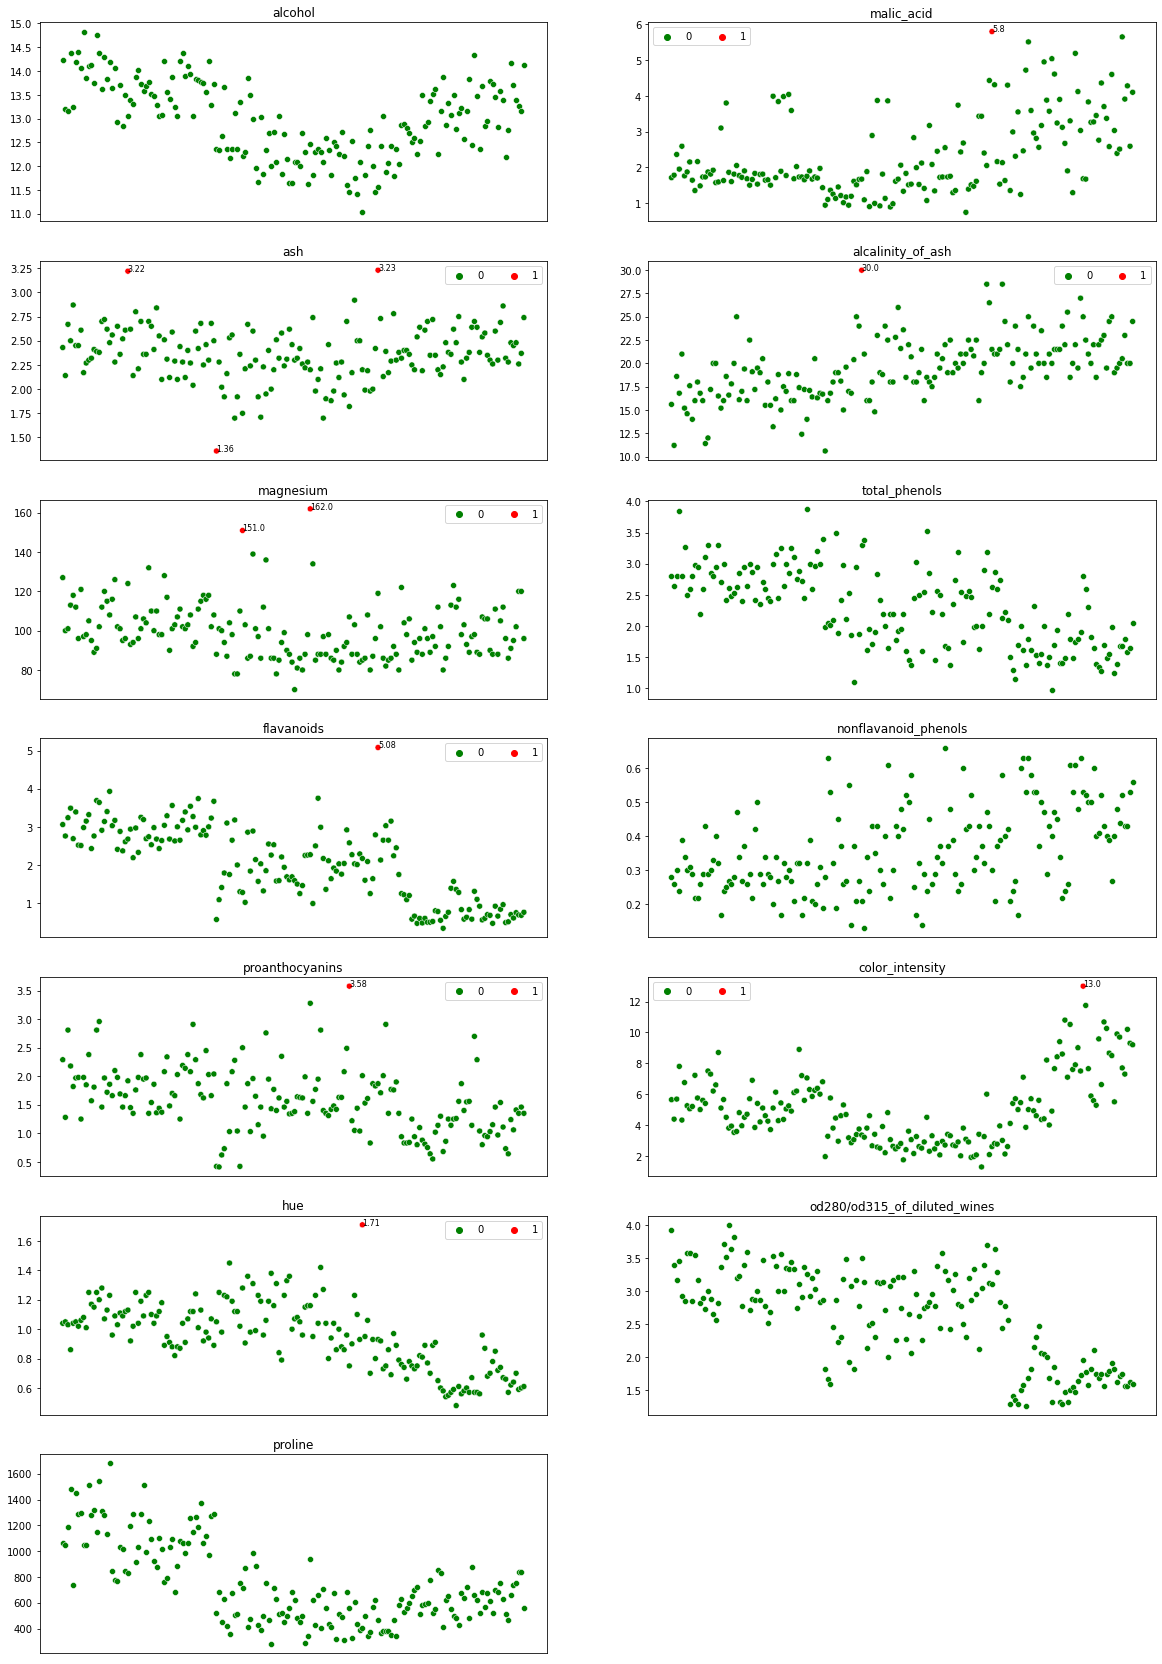

In [49]:
#PLOTTING A SCATTER PLOT AND HIGHLIGHTING THE OUTLIERS DETECTED BY Z-SCORE METHOD
fig, ax = plt.subplots(7, 2, figsize=(20, 30))
row = col = 0
for n,i in enumerate(data.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    outliers = zscore_outlier(data[i], -3, 3)
   
    if sum(outliers) == 0:
        sns.scatterplot(x = np.arange(len(data[i])), y = data[i], ax = ax[row, col], legend=False, color = 'green')
    else:
        sns.scatterplot(x = np.arange(len(data[i])), y = data[i], ax = ax[row, col], hue = outliers, palette = ['green','red'])
    for x,y in zip(np.arange(len(data[i]))[outliers == 1], data[i][outliers == 1]):
        ax[row,col].text(x = x, y = y, s = y, fontsize = 8)
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1
ax[row,col].axis('off')
plt.show()

<h1> Removing Outliers using IQR </h1>

In [112]:
# function to detect the outliers

def outliers_IQR(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR= Q3 - Q1
    lower_bound= Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)
    
    # store the index of outliers
    ls = df.index[(df[ft]<lower_bound) | (df[ft]>upper_bound)]
    
    return ls
    

In [113]:
index_list=[]
for c in data.columns:
    if pd.api.types.is_numeric_dtype(data[c]):
        index_list.extend(outliers_IQR(data,c))

In [114]:
print(index_list)

[123, 137, 173, 25, 59, 121, 59, 73, 121, 127, 69, 73, 78, 95, 95, 110, 151, 158, 159, 166, 115]


In [115]:
# function to remove the outliers

def remove_outliers(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    
    return df
    

In [116]:
data_cleaned=remove_outliers(data,index_list)

In [117]:
data_cleaned=pd.DataFrame(data_cleaned)

In [118]:
data_cleaned.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


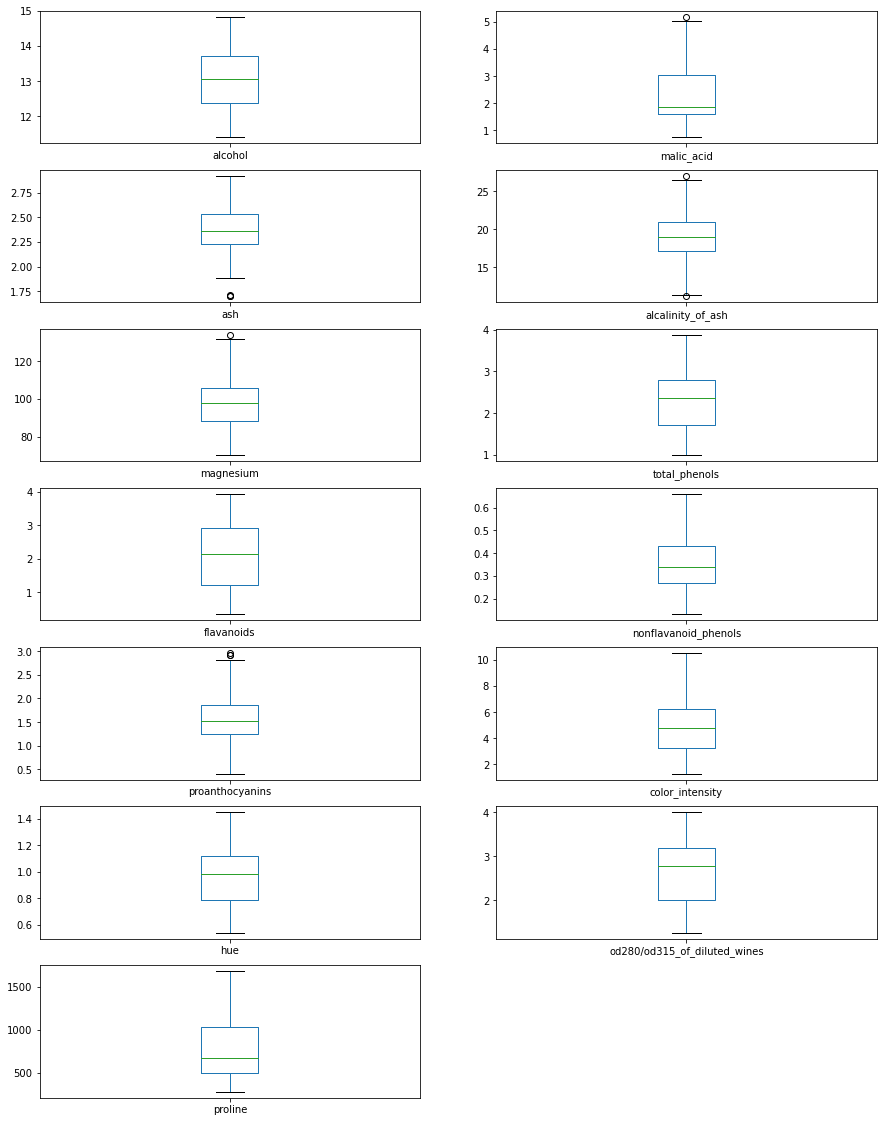

In [119]:
data_cleaned.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

In [120]:
data.shape

(178, 13)

In [122]:
data_cleaned.shape

(161, 13)